# [**FastICA sur des nuages de points 2D**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/2_5_decomposition/plot_ica_vs_pca.ipynb)<br/>([*FastICA on 2D point clouds*](https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_vs_pca.html))

Cet exemple illustre visuellement dans l'espace des caractéristiques une comparaison de résultats en utilisant deux techniques d'analyse de composantes différentes.

L'[**analyse en composantes indépendantes (ICA)** (2.5.6)](https://scikit-learn.org/stable/modules/decomposition.html#ica) versus l'[**analyse en composantes principales (ACP)** (2.5.1)](https://scikit-learn.org/stable/modules/decomposition.html#pca).

Représenter l'ICA dans l'espace des caractéristiques donne une vue de « l'ICA géométrique » : l'ICA est un algorithme qui trouve des directions dans l'espace des caractéristiques correspondant à des projections avec une grande non-gaussianité. Ces directions ne doivent pas être orthogonales dans l'espace des caractéristiques d'origine, mais elles sont orthogonales dans l'espace des caractéristiques blanchies, dans lequel toutes les directions correspondent à la même variance.

L'ACP, en revanche, trouve des directions orthogonales dans l'espace des caractéristiques brutes qui correspondent à des directions représentant la variance maximale.

Ici, nous simulons des sources indépendantes à l'aide d'un processus fortement non gaussien, 2 T de Student avec un faible nombre de degrés de liberté (figure en haut à gauche). Nous les mélangeons pour créer des observations (figure en haut à droite). Dans cet espace d'observation brut, les directions identifiées par l'ACP sont représentées par des vecteurs orange. Nous représentons le signal dans l'espace de l'ACP, après avoir blanchi par la variance correspondant aux vecteurs de l'ACP (en bas à gauche). Exécuter l'ICA correspond à trouver une rotation dans cet espace pour identifier les directions de plus grande non-gaussianité (en bas à droite).

In [1]:
# Authors: Alexandre Gramfort, Gael Varoquaux
# License: BSD 3 clause

# Générer des données d'exemple

In [2]:
import numpy as np

from sklearn.decomposition import PCA, FastICA

rng = np.random.RandomState(42)
S = rng.standard_t(1.5, size=(20000, 2))
S[:, 0] *= 2.0

# Mix data
A = np.array([[1, 1], [0, 2]])  # Mixing matrix

X = np.dot(S, A.T)  # Generate observations

pca = PCA()
S_pca_ = pca.fit(X).transform(X)

ica = FastICA(random_state=rng, whiten="arbitrary-variance")
S_ica_ = ica.fit(X).transform(X)  # Estimate the sources

S_ica_ /= S_ica_.std(axis=0)

# Tracer les résultats

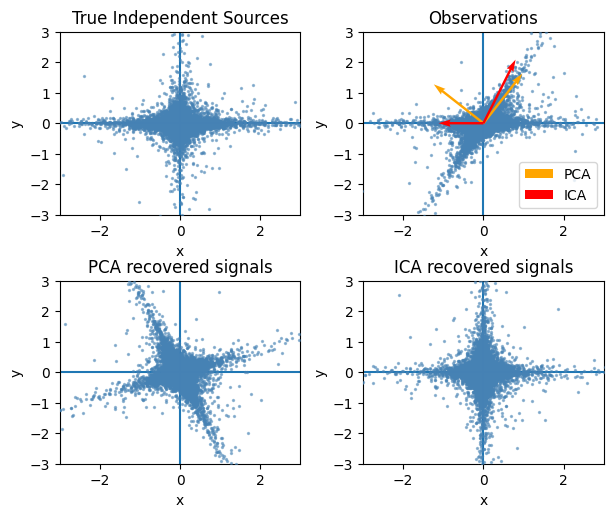

In [3]:
import matplotlib.pyplot as plt


def plot_samples(S, axis_list=None):
    plt.scatter(
        S[:, 0], S[:, 1], s=2, marker="o", zorder=10, color="steelblue", alpha=0.5
    )
    if axis_list is not None:
        for axis, color, label in axis_list:
            axis /= axis.std()
            x_axis, y_axis = axis
            plt.quiver(
                (0, 0),
                (0, 0),
                x_axis,
                y_axis,
                zorder=11,
                width=0.01,
                scale=6,
                color=color,
                label=label,
            )

    plt.hlines(0, -3, 3)
    plt.vlines(0, -3, 3)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.xlabel("x")
    plt.ylabel("y")


plt.figure()
plt.subplot(2, 2, 1)
plot_samples(S / S.std())
plt.title("True Independent Sources")

axis_list = [(pca.components_.T, "orange", "PCA"), (ica.mixing_, "red", "ICA")]
plt.subplot(2, 2, 2)
plot_samples(X / np.std(X), axis_list=axis_list)
legend = plt.legend(loc="lower right")
legend.set_zorder(100)

plt.title("Observations")

plt.subplot(2, 2, 3)
plot_samples(S_pca_ / np.std(S_pca_, axis=0))
plt.title("PCA recovered signals")

plt.subplot(2, 2, 4)
plot_samples(S_ica_ / np.std(S_ica_))
plt.title("ICA recovered signals")

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.36)
plt.show()